In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [29]:
x = np.array([0.2, 1.2, 1, 1.4, -1.5, 0.5, -0.5])
y = np.array([5.6, 8.6, 8, 9.2, 0.5, 6.5, 3.5])
eta = 0.2
initial_w, initial_b = 0.3, 0.1

In [30]:
class Model(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # In practice, these should be randomly initialized
    self.w = tf.Variable(initial_w)
    self.b = tf.Variable(initial_b)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

Loss Function

In [31]:
def loss(predicted_y, actual_y):
  return tf.reduce_mean(tf.square(predicted_y - actual_y))

In [32]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

Initial Weights

In [33]:
model.w.numpy(), model.b.numpy()

(0.3, 0.1)

In [34]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs),outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

In [35]:
model = Model()
list_w, list_b ,losses = [], [], []
for epoch in range(100):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print(f"Loss = {current_loss.numpy()}, w = {model.w.numpy()}, b = {model.b.numpy()}")

Loss = 40.191871643066406, w = 1.1766571998596191, b = 1.2574286460876465
Loss = 21.905994415283203, w = 1.7971644401550293, b = 2.125762462615967
Loss = 12.0192232131958, w = 2.233139753341675, b = 2.779653549194336
Loss = 6.652888774871826, w = 2.536583185195923, b = 3.2741165161132812
Loss = 3.7248435020446777, w = 2.7451975345611572, b = 3.6497464179992676
Loss = 2.115959644317627, w = 2.8862721920013428, b = 3.9365413188934326
Loss = 1.2237073183059692, w = 2.9795196056365967, b = 4.156706809997559
Loss = 0.7229235768318176, w = 3.0391433238983154, b = 4.326711177825928
Loss = 0.437572717666626, w = 3.0753469467163086, b = 4.458796501159668
Loss = 0.27193549275398254, w = 3.095433235168457, b = 4.5620856285095215
Loss = 0.17366068065166473, w = 3.1046056747436523, b = 4.643397331237793
Loss = 0.11389163881540298, w = 3.106550693511963, b = 4.707843780517578
Loss = 0.07655999809503555, w = 3.103860855102539, b = 4.759273052215576
Loss = 0.05259937793016434, w = 3.098344087600708, b

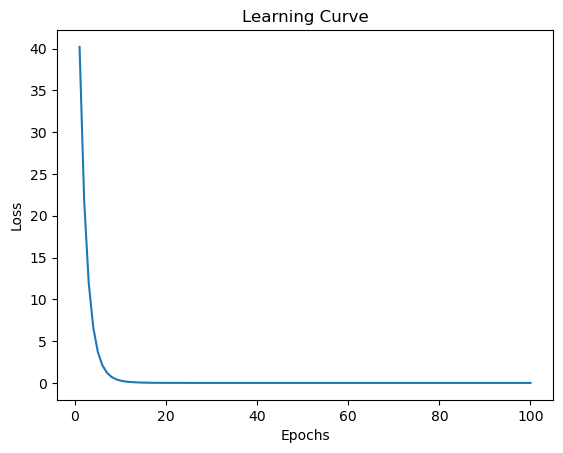

In [39]:
plt.plot(range(1, 101), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

Using `keras` API

In [43]:
initializer_w = tf.keras.initializers.Constant(value=0.3)
initializer_b = tf.keras.initializers.Constant(value=0.1)
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)),
                             tf.keras.layers.Dense(1,kernel_initializer=initializer_w,
                                                   bias_initializer=initializer_b)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               loss='mean_squared_error')
history = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 627ms/step - loss: 40.1919
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 21.9060
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0192
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6529
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 3.7248
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 2.1160
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 1.2237
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.7229
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4376
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2719
Epoch 11/100
1/1 [==============================] - 0s 46ms/step - loss: 0.1737
Epoch 12/100
1/1 [==============================] - 0s 58ms/step - loss: 0.1139
Epoch 13/100
1/1 [==============================] 

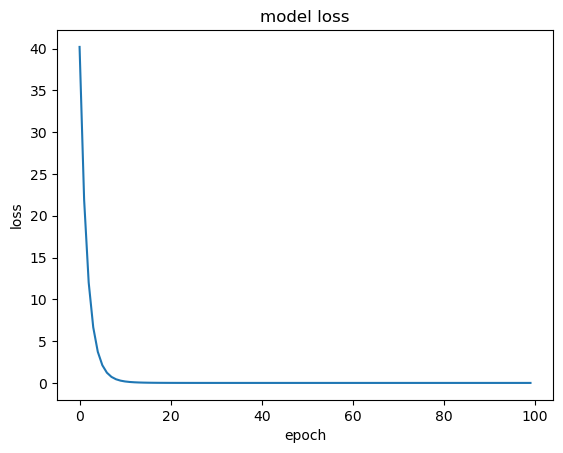

In [44]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [46]:
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)),
                             tf.keras.layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               loss='mean_squared_error')
history = model.fit(x, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 366ms/step - loss: 35.9803
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 19.9456
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 11.1886
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 6.3711
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 3.6953
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 2.1904
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 1.3308
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.8303
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5324
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3504
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2364
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.1629
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - los

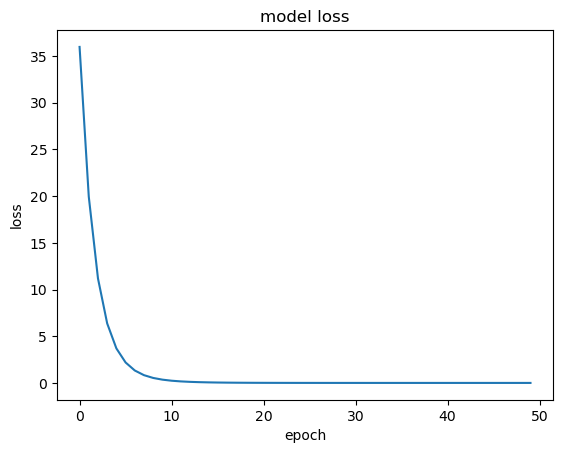

In [47]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()